# 新冠状病毒传播数据分析

## 1. 疫情初步分析，筛选相关性强的特征

通过官方公布的日频疫情数据、各地区（全国各省、直辖市、港澳台，去掉疫情严重的湖北和武汉）的历史天气、人口、GDP、距离武汉公里数等数据，筛选和确诊人数相关性强的特征。

所有数据都有各省、直辖市、港澳台、以及武汉，省的天气数据统计的是所在省会城市的数据。

### 1.1. 现有特征数据展示

In [1]:
# 日频数据的最后一天
last_date = None

In [2]:
from coronavirus_analyzer import CoronavirusAnalyzer
# 初始化分析类
analyzer = CoronavirusAnalyzer(last_date)

2020-02-02 19:17:26,760 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.
2020-02-02 19:17:27,113 - CoronavirusAnalyzer - WARNING - 在最后一天（2020-02-01），如下这些地区没有新增的确诊人数：台湾、西藏，如下这些地区没有任何疫情数据变化：台湾、西藏。请确保这些地区已经公布了最后一天的数据（一般是后面一天上午公布），否则分析出来的结果可能不准确。


In [3]:
# 地区相互距离矩阵
import pandas as pd
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 8)
print(analyzer.df_distance.index.tolist())
analyzer.df_distance

['北京', '上海', '天津', '重庆', '黑龙江', '吉林', '辽宁', '内蒙古', '河北', '山西', '山东', '河南', '陕西', '甘肃', '宁夏', '青海', '新疆', '安徽', '江苏', '浙江', '湖南', '江西', '湖北', '四川', '贵州', '福建', '台湾', '广东', '海南', '广西', '云南', '西藏', '香港', '澳门', '武汉']


,北京,上海,天津,重庆,...,西藏,香港,澳门,武汉
北京,0.000000,1063.211982,103.589069,1464.353444,...,2566.591142,1963.500780,1979.971010,1047.708830
上海,1063.211982,0.000000,961.335849,1448.054847,...,2907.958210,1227.709844,1272.272492,685.093039
...,...,...,...,...,...,...,...,...,...
澳门,1979.971010,1272.272492,1908.890967,1072.535924,...,2384.032442,64.228639,0.000000,934.088338
武汉,1047.708830,685.093039,981.317616,762.974248,...,2232.235661,921.636262,934.088338,0.000000


In [4]:
# 地区信息
import pandas as pd
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 12)
analyzer.df_region

,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉
地区,,,,,,,,,,,
全国,1.395380e+09,9.003000e+13,64520.059052,54776300.0,0.0000,964.998822,NaN,NaN,NaN,NaN,NaN
广东,1.134600e+08,9.727777e+12,85737.502203,590000.0,0.0052,17.970000,1583.818086,6.6,23.133333,113.250000,836.326981
...,...,...,...,...,...,...,...,...,...,...,...
西藏,3.371500e+06,1.477630e+11,43827.079935,0.0,0.0000,122.840000,364348.212962,3658.0,29.666667,91.166667,2232.235661
澳门,6.320000e+05,3.609000e+11,571044.303797,0.0,0.0000,0.002540,40.189873,19.0,22.216667,113.550000,934.088338


In [5]:
# 历史天气文字转数值
from weather_crawler import WeatherCrawler
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)

weather_crawler = WeatherCrawler()
weather_crawler.weather_info

,晴,多云,阴,雾,大雾,霾,中度霾,重度霾,阵雨,小雨,小到中雨,中雨,中到大雨,大雨,雨夹雪,阵雪,小雪,小到中雪,中雪,中到大雪,大雪
晴朗度,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
雾度,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
霾度,0,0,0,0,0,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0
降雨量,0,0,0,0,0,0,0,0,1,2,3,4,5,6,3,0,0,0,0,0,0
降雪量,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,3,4,5,6


In [6]:
# 历史天气（包括所有原始数据和天气文字转数值的数据，目前没有使用风向）
import pandas as pd
pd.set_option('display.max_columns', 40)
analyzer.df_weather.tail(2)

武汉                                                            \
           上午天气 下午天气 上午温度 下午温度   风向 最低风速 最高风速 上午晴朗度 上午雾度 上午霾度 上午降雨量 上午降雪量   
日期                                                                          
2020-01-31   多云   多云   13    0  东南风    1    2     2    0    0     0     0   
2020-02-01    晴    晴   13    4  东南风    3    4     3    0    0     0     0   

                                         上海            ...   湖南              \
           下午晴朗度 下午雾度 下午霾度 下午降雨量 下午降雪量 上午天气 下午天气 上午温度  ... 下午霾度 下午降雨量 下午降雪量   
日期                                                     ...                    
2020-01-31     2    0    0     0     0    晴   多云    8  ...    0     0     0   
2020-02-01     3    0    0     0     0    晴   多云   11  ...    0     2     0   

             香港                                                              \
           上午天气 下午天气 上午温度 下午温度     风向 最低风速 最高风速 上午晴朗度 上午雾度 上午霾度 上午降雨量 上午降雪量   
日期                                                                            
2020-01-31   多云   多云   18   12  无持续风向    1    2     2    0    0     0     0   
2020-02-01   多云   多云   18   13  无持续风向    1    2     2    0    0     0     0   

                                        
           下午晴朗度 下午雾度 下午霾度 下午降雨量 下午降雪量  
日期                                      
2020-01-31     2    0    0     0     0  
2020-02-01     2    0    0     0     0  

[2 rows x 595 columns]

In [7]:
# 历史天气平均数据
analyzer.df_weather_average.head()

/Users/hqs/github/coronavirus-analysis/weather_crawler.py:218: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df_all = pd.concat([df_virus_daily, df_weather], axis=1)


,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,...,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量
地区,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
上海,14.260870,14.488281,5.086957,5.378906,7.130435,7.244141,5.521739,5.375000,3.260870,3.187500,2.760870,2.687500,1.521739,1.457031,0.869565,0.851562,0.760870,0.728516,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.521739,2.804688,1.130435,1.195312,1.260870,1.402344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
云南,20.227273,18.987124,3.000000,2.678112,10.113636,9.493562,6.363636,6.304721,3.681818,3.652361,3.181818,3.152361,5.136364,4.639485,2.545455,2.283262,2.568182,2.319742,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.409091,0.682403,0.272727,0.450644,0.204545,0.341202,0.409091,0.682403,0.272727,0.450644,0.204545,0.341202
内蒙古,-19.550000,-17.636842,-15.000000,-14.094737,-9.775000,-8.818421,4.200000,3.905263,2.600000,2.452632,2.100000,1.952632,4.850000,5.147368,2.500000,2.615789,2.425000,2.573684,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.178947,0.100000,0.073684,0.150000,0.089474
北京,-1.652174,-1.093750,-5.782609,-5.621094,-0.826087,-0.546875,3.521739,3.390625,2.260870,2.195312,1.760870,1.695312,4.608696,4.378906,2.347826,2.222656,2.304348,2.189453,0.0,0.0,...,0.0,0.0,0.130435,0.179688,0.043478,0.058594,0.065217,0.089844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
台湾,33.478261,33.101562,15.043478,15.078125,16.739130,16.550781,6.739130,6.109375,3.869565,3.554688,3.369565,3.054688,2.043478,1.988281,1.130435,1.093750,1.021739,0.994141,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.652174,1.679688,0.869565,0.914062,0.826087,0.839844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 1.2. 疫情数据展示

疫情数据主要有 3 个：
1. 实时累计数据；疫情数据实时从网上爬取，一分钟一次，如果有任何数据变化，都会新增一行；
2. 日频累计数据：对实时累计数据进行处理，每日各地确诊人数有变化的第一条数据，作为前一天的日频累计数据（注意，不是当天的，因为实际很有可能是各地政府统计的到当天 0 点为止的数据）；
3. 日频增量数据：对日频累计数据进行处理，为每日日频值减去前一天日频值。

其他疫情数据的说明：
1. 疑似数据，目前只有自 2020-01-27 23:33 起的全国每日总量的公布，各地疑似人数公布极少；
2. 是否更新列，用于转换成日频数据用，为每天确诊人数变化的第一条，全国为每天疑似人数变化的第一条。

In [8]:
# 实时累计疫情数据
analyzer.df_virus.tail(2)

全国                           武汉                      湖北  \
                 是否更新   死亡   治愈     疑似     确诊 是否更新   死亡   治愈 疑似    确诊 是否更新   
2020-02-02 18:49    0  305  384  19544  14489    0  224  175  0  4109    0   
           18:56    0  304  384  19544  14489    0  224  175  0  4109    0   

                                      浙江                 ...   青海           \
                   死亡   治愈 疑似    确诊 是否更新 死亡  治愈 疑似   确诊  ... 是否更新 死亡 治愈 疑似   
2020-02-02 18:49  294  252  0  9074    0  1  23  0  661  ...    0  0  0  0   
           18:56  294  252  0  9074    0  1  23  0  661  ...    0  0  0  0   

                       台湾                澳门               西藏              
                  确诊 是否更新 死亡 治愈 疑似  确诊 是否更新 死亡 治愈 疑似 确诊 是否更新 死亡 治愈 疑似 确诊  
2020-02-02 18:49  11    0  0  1  0  10    0  0  0  0  8    0  0  0  0  1  
           18:56  11    0  0  1  0  10    0  0  0  0  8    0  0  0  0  1  

[2 rows x 180 columns]

In [9]:
# 日频累计疫情数据（取各地区每日第一条更新的数据，作为前一天的日频数据）
analyzer.df_virus_daily.tail(2)

全国                              武汉                         湖北  \
               死亡     治愈       疑似       确诊     死亡     治愈   疑似      确诊     死亡   
2020-01-31  259.0  276.0  17988.0  11901.0  192.0  106.0  0.0  3215.0  249.0   
2020-02-01  304.0  384.0  19544.0  14489.0  224.0  138.0  0.0  4109.0  294.0   

                                 浙江                     广东                    \
               治愈   疑似      确诊   死亡    治愈   疑似     确诊   死亡    治愈   疑似     确诊   
2020-01-31  166.0  0.0  7153.0  0.0  15.0  0.0  599.0  0.0  10.0  0.0  520.0   
2020-02-01  215.0  0.0  9074.0  1.0  23.0  0.0  661.0  0.0  14.0  0.0  604.0   

            ...   香港                   青海                   台湾            \
            ...   死亡   治愈   疑似    确诊   死亡   治愈   疑似    确诊   死亡   治愈   疑似   
2020-01-31  ...  0.0  0.0  0.0  13.0  0.0  0.0  0.0   9.0  0.0  1.0  0.0   
2020-02-01  ...  0.0  0.0  0.0  14.0  0.0  0.0  0.0  11.0  0.0  1.0  0.0   

                   澳门                  西藏                 
              确诊   死亡   治愈   疑似   确诊   死亡   治愈   疑似   确诊  
2020-01-31  10.0  0.0  0.0  0.0  7.0  0.0  0.0  0.0  1.0  
2020-02-01  10.0  0.0  0.0  0.0  8.0  0.0  0.0  0.0  1.0  

[2 rows x 144 columns]

In [10]:
# 日频增量疫情数据（每日第一条更新的累计数据和上一日第一条更新的累计数据差）
analyzer.df_virus_daily_inc.tail(2)

全国                           武汉                      湖北        \
              死亡     治愈      疑似      确诊    死亡    治愈   疑似     确诊    死亡    治愈   
2020-01-31  46.0   61.0  2750.0  2089.0  33.0  31.0  0.0  576.0  45.0  80.0   
2020-02-01  45.0  108.0  1556.0  2588.0  32.0  32.0  0.0  894.0  45.0  49.0   

                          浙江                   广东                   ...   香港  \
             疑似      确诊   死亡   治愈   疑似    确诊   死亡   治愈   疑似     确诊  ...   死亡   
2020-01-31  0.0  1347.0  0.0  6.0  0.0  62.0  0.0  0.0  0.0  127.0  ...  0.0   
2020-02-01  0.0  1921.0  1.0  8.0  0.0  62.0  0.0  4.0  0.0   84.0  ...  0.0   

                            青海                  台湾                  澳门       \
             治愈   疑似   确诊   死亡   治愈   疑似   确诊   死亡   治愈   疑似   确诊   死亡   治愈   
2020-01-31  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2020-02-01  0.0  0.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0   

                       西藏                 
             疑似   确诊   死亡   治愈   疑似   确诊  
2020-01-31  0.0  0.0  0.0  0.0  0.0  0.0  
2020-02-01  0.0  1.0  0.0  0.0  0.0  0.0  

[2 rows x 144 columns]

### 1.3. 将各地确诊人数作为目标值，作为特征筛选的依据

In [11]:
# 取最新一条实时累计疫情数据，作为特征筛选的依据
recent_virus = analyzer.df_virus.iloc[-1]
pd.DataFrame(recent_virus).T

全国                           武汉                      湖北  \
                 是否更新   死亡   治愈     疑似     确诊 是否更新   死亡   治愈 疑似    确诊 是否更新   
2020-02-02 18:56    0  304  384  19544  14489    0  224  175  0  4109    0   

                                      浙江                 ...   青海           \
                   死亡   治愈 疑似    确诊 是否更新 死亡  治愈 疑似   确诊  ... 是否更新 死亡 治愈 疑似   
2020-02-02 18:56  294  252  0  9074    0  1  23  0  661  ...    0  0  0  0   

                       台湾                澳门               西藏              
                  确诊 是否更新 死亡 治愈 疑似  确诊 是否更新 死亡 治愈 疑似 确诊 是否更新 死亡 治愈 疑似 确诊  
2020-02-02 18:56  11    0  0  1  0  10    0  0  0  0  8    0  0  0  0  1  

[1 rows x 180 columns]

In [12]:
import pandas as pd
# 取最新一条实时累计疫情数据中的确诊人数
index = [_[0] for _ in recent_virus.index[::5]]
s_virus = pd.Series(recent_virus.values[4::5], index=index)
s_virus.name = '确诊'
pd.DataFrame(s_virus).T

,全国,武汉,湖北,浙江,广东,河南,湖南,安徽,江西,重庆,江苏,四川,山东,北京,上海,福建,陕西,广西,云南,河北,黑龙江,辽宁,海南,山西,天津,甘肃,贵州,宁夏,内蒙古,吉林,新疆,香港,青海,台湾,澳门,西藏
确诊,14489,4109,9074,661,632,493,463,340,333,275,236,231,230,191,182,159,116,111,105,104,95,69,64,56,48,40,38,28,27,23,21,14,11,10,8,1


### 1.4. 构造、合并特征数据和分析目标

去掉湖北、武汉数据，避免对分析造成影响

In [13]:
# 合并地区信息、疫情 DataFrame
df = pd.concat([analyzer.df_region, s_virus], axis=1, sort=False)
# 去掉全国、以及疫情严重的湖北、武汉，增加确诊人口占比列
index = df.index.tolist()
index.remove('全国')
df = df.loc[index]
# 再合并入天气平均数据
df = pd.concat([analyzer.df_weather_average, df], axis=1, sort=False)
df['确诊'].fillna(0, inplace=True)
# 去掉疫情严重的湖北、武汉
index = df.index.tolist()
index.remove('湖北')
index.remove('武汉')
df = df.loc[index]

pd.set_option('display.max_rows', 2)
pd.set_option('display.max_columns', 100)
df

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉,确诊
上海,14.260870,14.488281,5.086957,5.378906,7.130435,7.244141,5.521739,5.375000,3.260870,3.187500,2.760870,2.687500,1.521739,1.457031,0.869565,0.851562,0.760870,0.728516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.521739,2.804688,1.130435,1.195312,1.26087,1.402344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24237800.0,3.267987e+12,134830.182607,9726900.0,0.401311,0.63,259.924581,4.5,31.233333,121.483333,685.093039,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江,-33.238095,-32.004739,-22.952381,-22.492891,-16.619048,-16.002370,3.666667,3.976303,2.333333,2.488152,1.833333,1.988152,4.809524,4.796209,2.523810,2.578199,2.404762,2.398104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.285714,0.327014,0.095238,0.094787,0.142857,0.163507,37887000.0,1.636162e+12,43185.314224,500000.0,0.013197,45.48,12004.117507,171.7,45.750000,126.683333,1992.035603,95


### 1.5. 归一化数据

避免特征值本身大小影响分析

In [14]:
# 正态分布归一化数据
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
arr = standard_scaler.fit_transform(df)
df_standard = pd.DataFrame(arr, index=df.index, columns=df.columns)
df_standard

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉,确诊
上海,0.404003,0.417272,0.543473,0.573989,0.404003,0.417272,1.280255,1.085767,1.280255,1.085767,1.280255,1.085767,-1.500717,-1.457742,-1.389346,-1.354367,-1.500717,-1.457742,-0.305991,-0.332647,-0.268946,-0.249731,-0.305991,-0.332647,-0.264151,-0.263862,-0.256329,-0.250999,-0.264151,-0.263862,1.859803,1.868348,1.622530,1.506931,1.859803,1.868348,-0.729694,-0.690117,-0.666894,-0.649295,-0.729694,-0.690117,-0.586047,0.178044,0.432847,3.711245,3.496561,-0.740493,-0.328960,-0.614836,-0.182266,1.064326,-0.618744,0.100828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江,-2.193008,-2.242239,-2.201809,-2.245403,-2.193008,-2.242239,-0.460734,-0.206582,-0.460734,-0.206582,-0.460734,-0.206582,1.272004,1.259380,1.393114,1.496676,1.272004,1.259380,-0.305991,-0.332647,-0.268946,-0.249731,-0.305991,-0.332647,-0.264151,-0.263862,-0.256329,-0.250999,-0.264151,-0.263862,-0.923209,-0.947040,-0.912556,-0.940428,-0.923209,-0.947040,0.257338,0.417323,0.071229,-0.006721,0.257338,0.417323,-0.119861,-0.524437,-0.478386,-0.488334,-0.381332,0.443544,-0.148337,-0.408308,1.881907,1.665539,1.800286,-0.388981


### 1.6. 计算特征和目标的相关性

In [15]:
# 计算各种因子和“确诊”的相关性
corr = df_standard.corr().iloc[-1:, :-1]
corr

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉
确诊,0.238765,0.244986,0.26691,0.275131,0.238765,0.244986,0.23434,0.301802,0.23434,0.301802,0.23434,0.301802,-0.461045,-0.456228,-0.440693,-0.435395,-0.461045,-0.456228,-0.193717,-0.203421,-0.164088,-0.153963,-0.193717,-0.203421,-0.130111,-0.129236,-0.127617,-0.124216,-0.130111,-0.129236,0.525347,0.528291,0.537488,0.54577,0.525347,0.528291,0.058224,0.032921,0.028878,-0.015057,0.058224,0.032921,0.720444,0.683278,-0.159021,0.16876,-0.010379,-0.265419,-0.255954,-0.384541,-0.216125,0.240738,-0.552354


In [16]:
# 各特征与确诊人数的相关性
corr_injured = corr.loc['确诊']
corr_injured

pd.set_option('display.max_columns', 100)
sorted_index = corr_injured.abs().sort_values(ascending=False).index
selected_factor_set = set()
selected_factors = []
for idx in sorted_index:
    if idx.startswith('加权') or idx.startswith('人均'):
        idx_in_set = idx[2:]
    elif idx.endswith('占比'):
        idx_in_set = idx[:-2]
    else:
        idx_in_set = idx
    if idx_in_set not in selected_factor_set:
        selected_factor_set.add(idx_in_set)
        selected_factors.append(idx)
corr_injured_sum = corr_injured[selected_factors].abs().sum()
selected_target = '确诊'
print('与“{}”相关性从大到小的指标依次为（忽略相关性较弱的相似指标）：{}。'.format(selected_target, selected_factors))
pd.DataFrame([corr_injured])[sorted_index]

与“确诊”相关性从大到小的指标依次为（忽略相关性较弱的相似指标）：['人口', 'GDP', '距离武汉', '加权平均下午降雨量', '加权平均上午降雨量', '加权平均日均降雨量', '平均日均晴朗度', '平均上午晴朗度', '平均下午晴朗度', '海拔', '加权平均最高风速', '加权平均日均风速', '加权平均最低风速', '加权平均下午温度', '面积', '加权平均日均温度', '加权平均上午温度', '东经', '北纬', '加权平均上午雾度', '加权平均日均雾度', '流动人口', '平均下午雾度', '平均上午霾度', '平均日均霾度', '平均下午霾度', '平均日均降雪量', '平均上午降雪量', '平均下午降雪量']。


,人口,GDP,距离武汉,加权平均下午降雨量,平均下午降雨量,加权平均上午降雨量,加权平均日均降雨量,平均上午降雨量,平均日均降雨量,平均日均晴朗度,平均上午晴朗度,加权平均上午晴朗度,加权平均日均晴朗度,平均下午晴朗度,加权平均下午晴朗度,海拔,加权平均最高风速,加权平均日均风速,加权平均最低风速,加权平均下午温度,平均下午温度,面积,人均面积,加权平均日均温度,加权平均上午温度,东经,平均日均温度,平均上午温度,平均最高风速,平均日均风速,平均最低风速,北纬,加权平均上午雾度,加权平均日均雾度,平均日均雾度,平均上午雾度,流动人口,平均下午雾度,人均GDP,加权平均下午雾度,平均上午霾度,平均日均霾度,加权平均上午霾度,加权平均日均霾度,平均下午霾度,加权平均下午霾度,平均日均降雪量,平均上午降雪量,加权平均日均降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,流动人口占比
确诊,0.720444,0.683278,-0.552354,0.54577,0.537488,0.528291,0.528291,0.525347,0.525347,-0.461045,-0.461045,-0.456228,-0.456228,-0.440693,-0.435395,-0.384541,0.301802,0.301802,0.301802,0.275131,0.26691,-0.265419,-0.255954,0.244986,0.244986,0.240738,0.238765,0.238765,0.23434,0.23434,0.23434,-0.216125,-0.203421,-0.203421,-0.193717,-0.193717,0.16876,-0.164088,-0.159021,-0.153963,-0.130111,-0.130111,-0.129236,-0.129236,-0.127617,-0.124216,0.058224,0.058224,0.032921,0.032921,0.028878,-0.015057,-0.010379


### 1.7. 对选定的特征数据之间的相关性进行分析，进一步筛选特征数据

先查看特征之间的相关性。

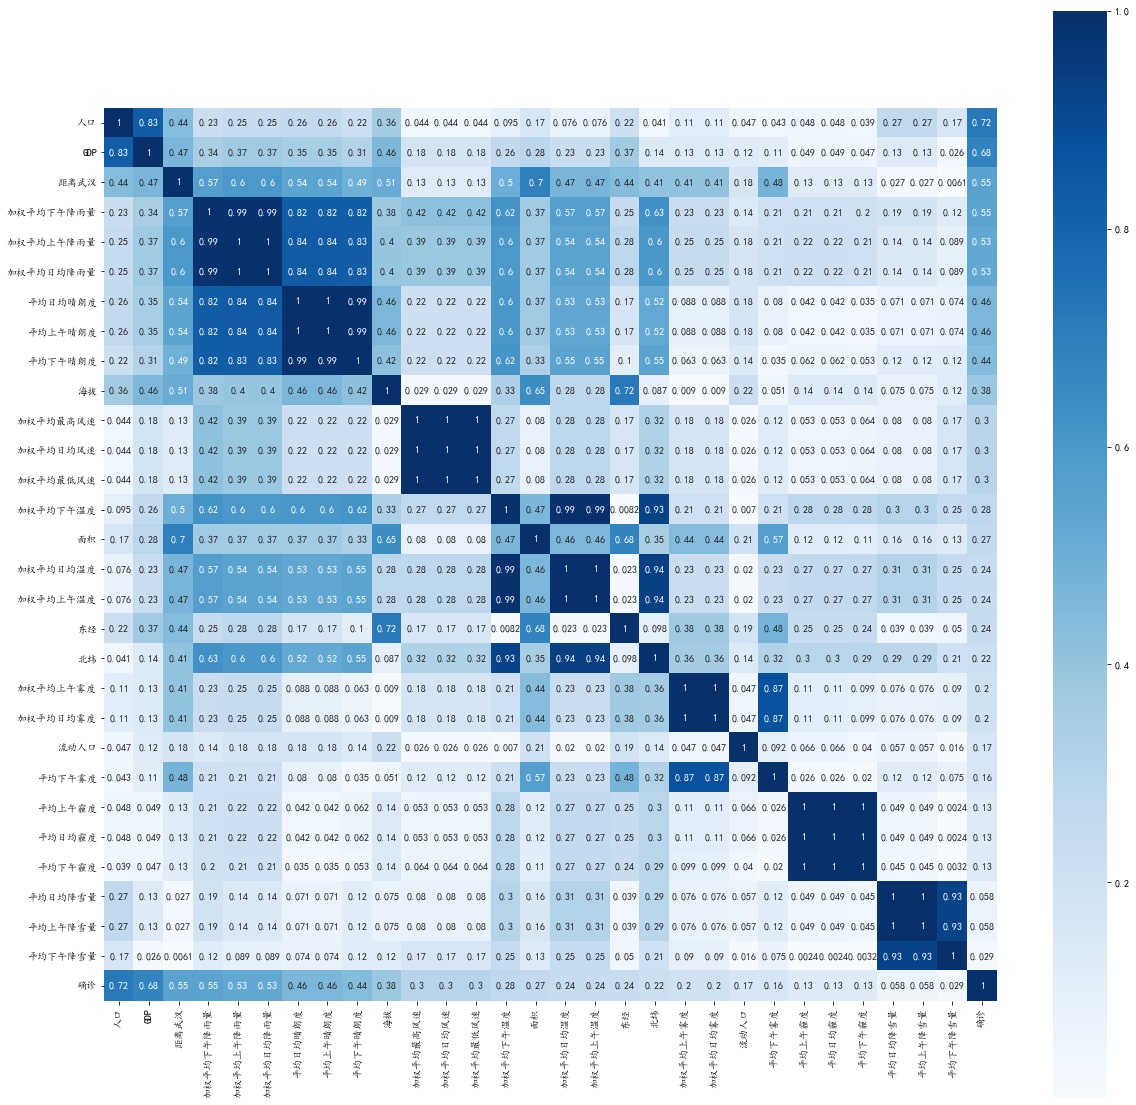

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

df_region_info_weather = df_standard[selected_factors + [selected_target]]
df_corr = df_region_info_weather.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr.abs(), annot=True, vmax=1, square=True, cmap="Blues")

如上图，将相互强相关的特征数据，取其中一个：对“上午”、“下午”、“最高”、“最低”、“日均”取“日均”。如下图。

再次筛选后的特征和目标：人口、GDP、距离武汉、加权平均日均降雨量、平均日均晴朗度、海拔、加权平均日均风速、面积、加权平均日均温度、东经、北纬、加权平均日均雾度、流动人口、平均日均霾度、平均日均降雪量、确诊


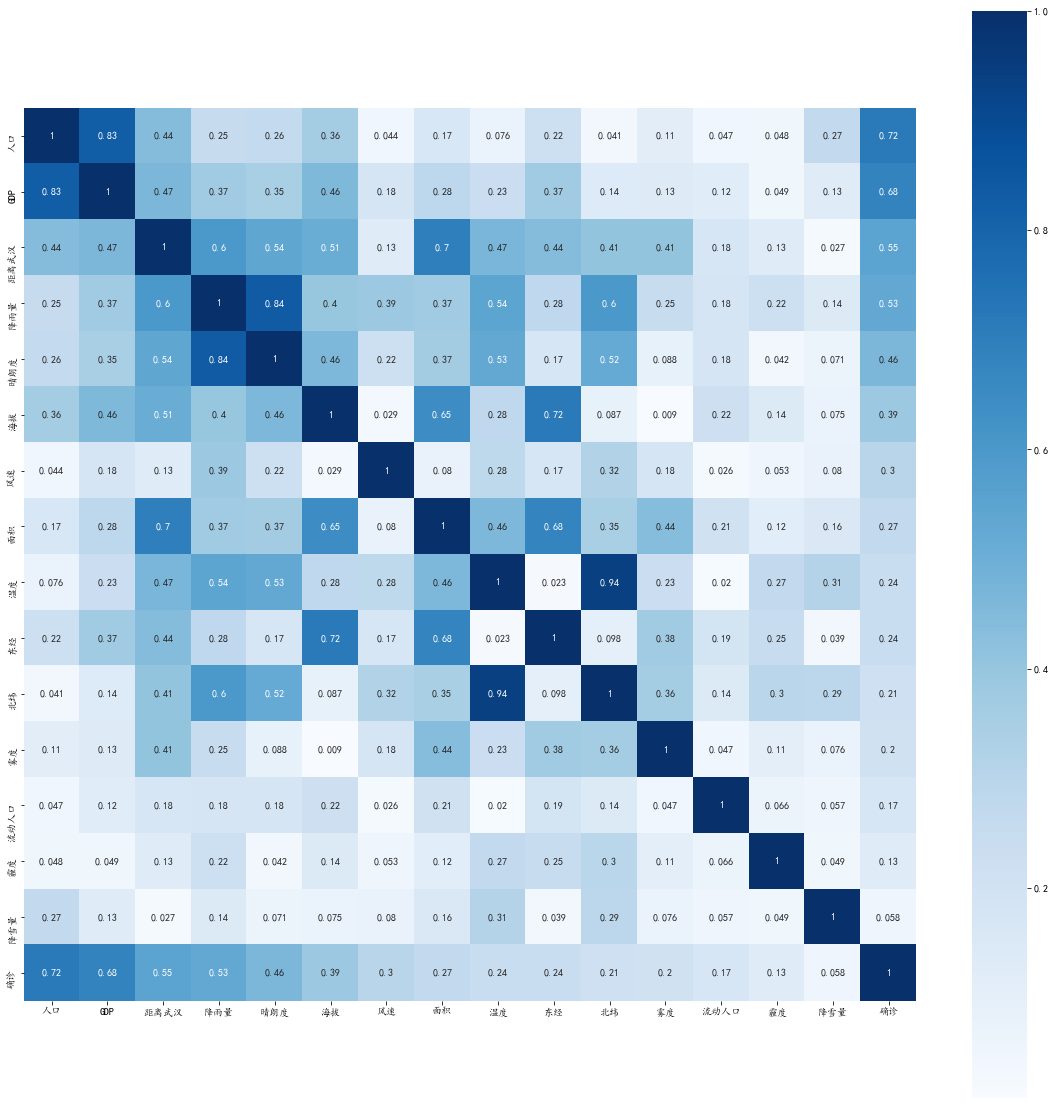

In [19]:
selected_cols = []
selected_col_short_names = []  # 后续对特征使用缩写的名称
for col in df_region_info_weather.columns:
    if '平均' in col:
        name = col.replace('加权', '').replace('上午', '').replace('下午', '').replace('最高', '')\
               .replace('最低', '').replace('日均', '')
        if '日均' in col:
            selected_cols.append(col)
            selected_col_short_names.append(name.replace('平均', ''))
    else:
        selected_cols.append(col)
        selected_col_short_names.append(col)
print('再次筛选后的特征和目标：{}'.format('、'.join(selected_cols)))
df_selected = df_region_info_weather[selected_cols]
df_selected.columns = selected_col_short_names
df_corr = df_selected.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr.abs(), annot=True, vmax=1, square=True, cmap="Blues")

In [20]:
df_corr.iloc[-1:, :-1]

,人口,GDP,距离武汉,降雨量,晴朗度,海拔,风速,面积,温度,东经,北纬,雾度,流动人口,霾度,降雪量
确诊,0.719956,0.683504,-0.5527,0.528371,-0.462464,-0.38616,0.299705,-0.265584,0.244208,0.241787,-0.214955,-0.203008,0.168412,-0.129794,0.057504


### 1.8. 相关性分析结论

In [21]:
corr_analysis = df_corr.iloc[-1:, :-1].T
corr_analysis.columns = ['和确诊的相关性（绝对值越大表示越相关）']
corr_info_dict = {
    '人口': ('人口越多的地区，被确诊的人数越多', '人口越少的地区，被确诊的人数越多'),
    'GDP': ('GDP 越高的地区，被确诊的人数越多', 'GDP 越低的地区，被确诊的人数越多'),
    '距离武汉': ('离武汉越远，被确诊的人数越多', '离武汉越近，被确诊的人数越多'),
    '降雨量': ('降雨量越多的地区，被确诊的人数越多', '降雨量越少的地区，被确诊的人数越多'),
    '晴朗度': ('天越晴的地区，被确诊的人数越多', '天越阴的地区，被确诊的人数越多'),
    '海拔': ('海拔越高的地区，被确诊的人数越多', '海拔越低的地区，被确诊的人数越多'),
    '面积': ('面积越大的地区，被确诊的人数越多', '面积越小的地区，被确诊的人数越多'),
    '温度': ('温度越高的地区，被确诊的人数越多', '温度越低的地区，被确诊的人数越多'),
    '流动人口': ('流动人口越高的地区，被确诊的人数越多', '流动人口越低的地区，被确诊的人数越多'),
    '东经': ('越东方的地区，被确诊的人数越多', '越北方的地区，被确诊的人数越多'),
    '北纬': ('越北方的地区，被确诊的人数越多', '越南方的地区，被确诊的人数越多'),
    '雾度': ('雾越多的地区，被确诊的人数越多', '雾越少的地区，被确诊的人数越多'),
    '霾度': ('霾越多的地区，被确诊的人数越多', '霾越少的地区，被确诊的人数越多'),
    '降雪量': ('降雪量越多的地区，被确诊的人数越多', '降雪量越少的地区，被确诊的人数越多'),
    '风速': ('风速越高的地区，被确诊的人数越多', '风速越低的地区，被确诊的人数越多'),
}
desc = []
for name, val in zip(corr_analysis.index, corr_analysis.values.reshape(-1)):
    if abs(val) > 0.1:
        if val > 0:
            desc.append(corr_info_dict[name][0])
        else:
            desc.append(corr_info_dict[name][1])
    else:
        desc.append('该因素几乎没有影响')
corr_analysis['新冠状病毒影响因素分析（影响力从高到低排序）'] = desc
pd.set_option('display.max_rows', 30)
corr_analysis

,和确诊的相关性（绝对值越大表示越相关）,新冠状病毒影响因素分析（影响力从高到低排序）
人口,0.719956,人口越多的地区，被确诊的人数越多
GDP,0.683504,GDP 越高的地区，被确诊的人数越多
距离武汉,-0.552700,离武汉越近，被确诊的人数越多
降雨量,0.528371,降雨量越多的地区，被确诊的人数越多
晴朗度,-0.462464,天越阴的地区，被确诊的人数越多
海拔,-0.386160,海拔越低的地区，被确诊的人数越多
风速,0.299705,风速越高的地区，被确诊的人数越多
面积,-0.265584,面积越小的地区，被确诊的人数越多
温度,0.244208,温度越高的地区，被确诊的人数越多
东经,0.241787,越东方的地区，被确诊的人数越多


**从天气数据看，<font color=red>晴天</font>相对安全一些。**

## 2. 疫情趋势分析

### 2.1. 查看各地每日新增确诊人数趋势图

In [18]:
from coronavirus_analyzer import CoronavirusAnalyzer
from util.util import Util
import pandas as pd
import datetime

# FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. 
# The converter was registered by pandas on import. Future versions of pandas will require you to 
# explicitly register matplotlib converters.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 初始化分析类
analyzer = CoronavirusAnalyzer(last_date)

df_virus_daily_inc = analyzer.df_virus_daily_inc

regions = df_virus_daily_inc.columns.levels[0][df_virus_daily_inc.columns.codes[0][::4]]
df_virus_daily_inc_injured = analyzer.get_injured(df_virus_daily_inc)

2020-02-02 19:18:02,051 - CoronavirusAnalyzer - WARNING - 在最后一天（2020-02-01），如下这些地区没有新增的确诊人数：台湾、西藏，如下这些地区没有任何疫情数据变化：台湾、西藏。请确保这些地区已经公布了最后一天的数据（一般是后面一天上午公布），否则分析出来的结果可能不准确。


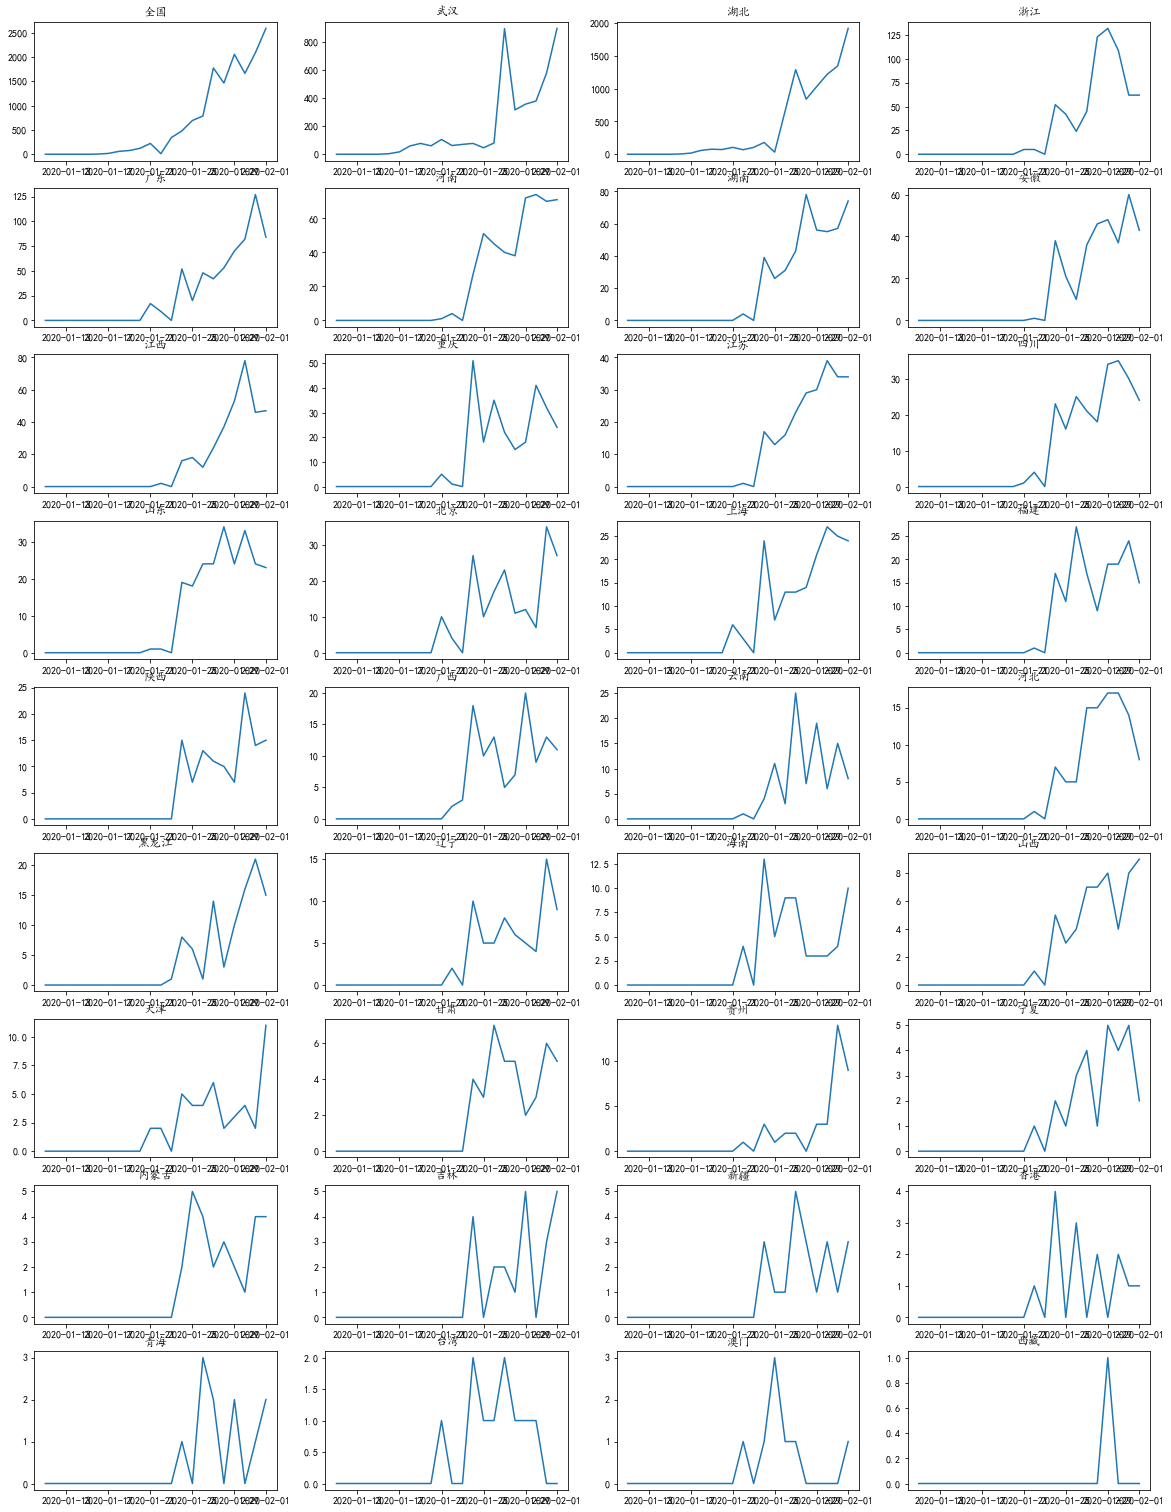

In [19]:
from util.util import Util
import matplotlib.pyplot as plt

analyzer.subplots(analyzer.df_virus_daily_inc_injured)

### 2.2. 分类
通过上面的图，可以看到一些相似趋势形状的图形，尝试用 max min 归一化，进行分类；但当前累计确诊人数全国各地差异较大，需要区别对待。

#### 2.2.1. 对各地当前累计确诊人数分类
将湖北、武汉区别出来，其他地区当前累计确诊人数用 k-means 分类

In [20]:
n_clusters = 5

df_recent_daily_injured = analyzer.df_recent_daily_injured
omitted_regions = ['全国', '武汉']
for region in omitted_regions:
    del df_recent_daily_injured[region]
clf, regions_by_cluster, cluster_centers = analyzer.k_means(
    df_recent_daily_injured, n_clusters=n_clusters, insure_sorted=True)
print('除了{}，累计确诊人数从高到低分 {} 类：'.format('、'.join(omitted_regions), n_clusters))
clusters_by_cum = {}
cum_desc = {0: '特多', 1: '多', 2: '中', 3: '少', 4: '极少'}
for i, _ in enumerate(zip(cluster_centers.tolist(), regions_by_cluster, cum_desc.values())):
    center, cluster, desc = _
    clusters_by_cum[i] = cluster
    print('{}：簇 id：{}，簇中心：{}，分类：{}'.format(desc, i, center[0], cluster))

除了全国、武汉，累计确诊人数从高到低分 5 类：
特多：簇 id：0，簇中心：9074.0，分类：['湖北']
多：簇 id：1，簇中心：555.25，分类：['浙江' '广东' '河南' '湖南']
中：簇 id：2，簇中心：271.1666666666667，分类：['安徽' '江西' '重庆' '江苏' '四川' '山东']
少：簇 id：3，簇中心：130.5，分类：['北京' '上海' '福建' '陕西' '广西' '云南' '河北' '黑龙江']
极少：簇 id：4，簇中心：30.199999999999932，分类：['辽宁' '海南' '山西' '天津' '甘肃' '贵州' '宁夏' '内蒙古' '吉林' '新疆' '香港' '青海' '台湾' '澳门'
 '西藏']


#### 2.2.2. 对各地每日新增确诊人数的 3 日均线走势图进行分类

先对数据作 3 日均线处理，以减少单日波动（比如有时候单日疑似数量非常多，但新增很少，到后面一天则相反）

In [21]:
# 均匀分布归一化数据，并用 k-means 分类
from sklearn import preprocessing
import pandas as pd

# 每天分类可能不同，需要做相应的调整，调整。方法是，先用 0,1,2...,n （n+1为簇总数）的顺序，执行程序并画图。
# 如果分类出来的簇中心的趋势严重性不是从高到低，则调整顺序。
_inc_desc = (
    (0, '新增趋势向上加剧'), 
    (1, '新增趋势向上放缓'), 
    (2, '新增趋势近期平稳'), 
    (3, '新增趋势有所降低'), 
    (4, '新增趋势显著降低'), 
)

inc_desc = {}
order = []
for i, _ in enumerate(_inc_desc):
    c_id, desc = _
    inc_desc[i] = desc
    order.append(c_id)
n_clusters = len(inc_desc)

# 3日新增确诊人数均值
df_ma3 = analyzer.moving_avg(analyzer.df_virus_daily_inc_injured, window_size=3)

min_max_scaler = preprocessing.MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(df_ma3)
df_min_max = pd.DataFrame(X_min_max, index=df_ma3.index, columns=df_ma3.columns)
for region in omitted_regions:
    del df_min_max[region]
clf, regions_by_cluster, cluster_centers = analyzer.k_means(
    df_min_max, n_clusters=n_clusters, max_iter=300, n_jobs=4, try_times=1000, order=order)
print('各数据离簇中心距离和：{}'.format(clf.inertia_))

各数据离簇中心距离和：5.751372495221927


簇 id：0，新增趋势向上加剧，['簇中心 1', '湖北', '广东', '江西', '黑龙江', '贵州']


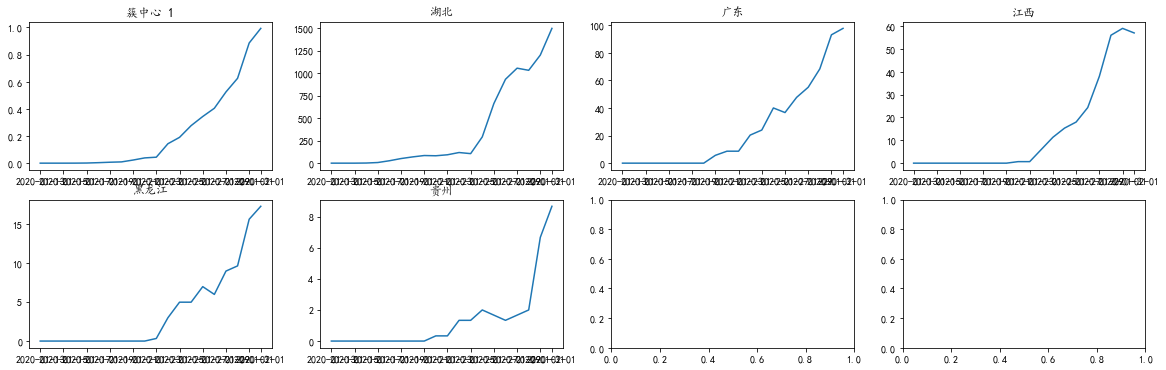

簇 id：1，新增趋势向上放缓，['簇中心 2', '浙江', '河南', '湖南', '安徽', '江苏', '四川', '山东', '上海', '陕西', '云南', '河北', '山西', '宁夏', '吉林']


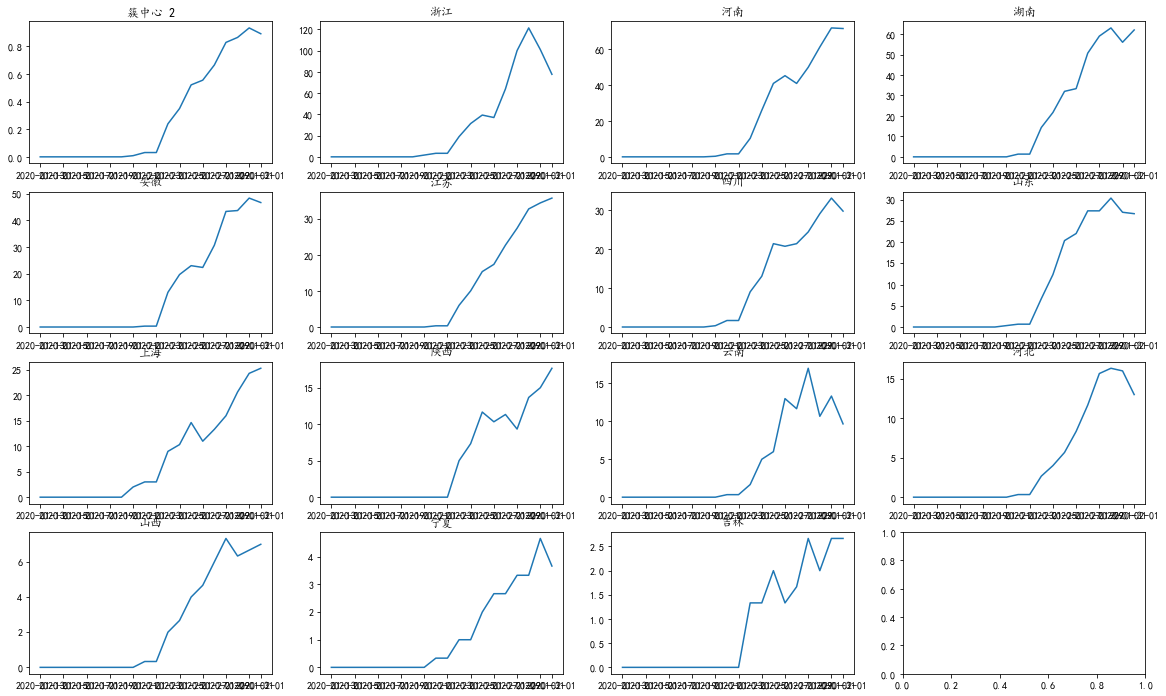

簇 id：2，新增趋势近期平稳，['簇中心 3', '重庆', '北京', '福建', '广西', '辽宁', '天津', '甘肃', '内蒙古', '新疆', '青海', '台湾']


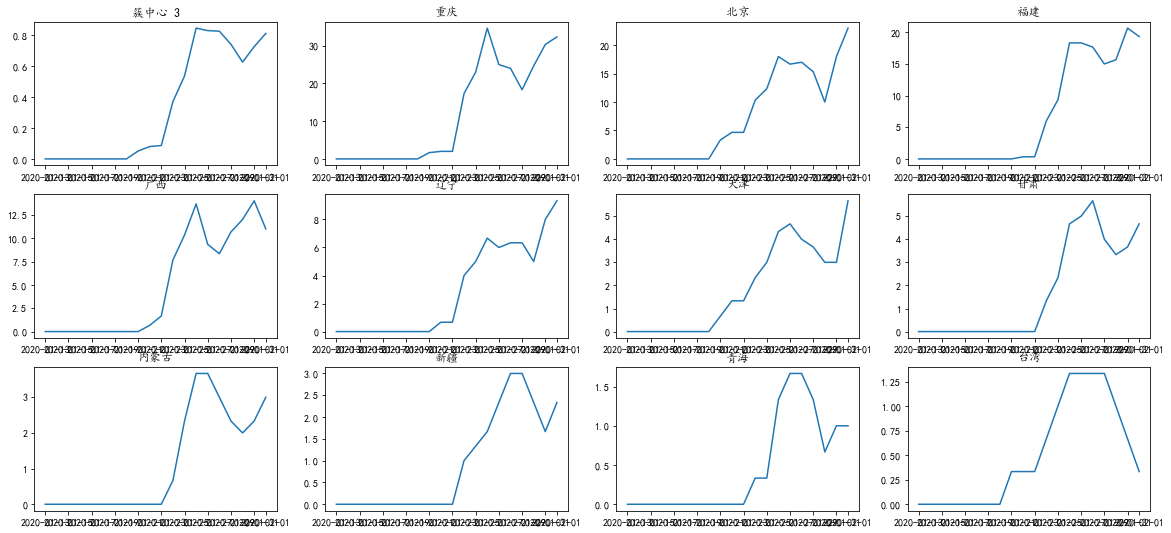

簇 id：3，新增趋势有所降低，['簇中心 4', '海南', '香港', '澳门']


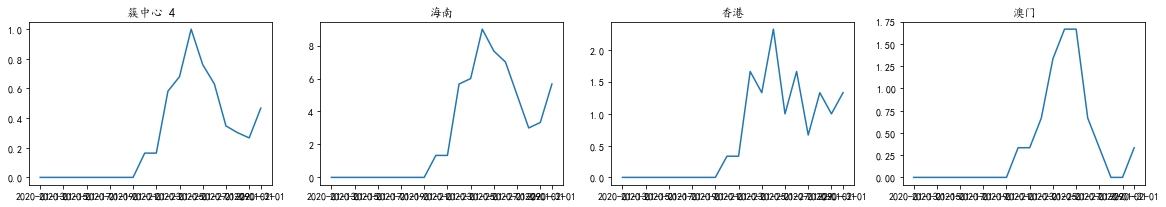

簇 id：4，新增趋势显著降低，['簇中心 5', '西藏']


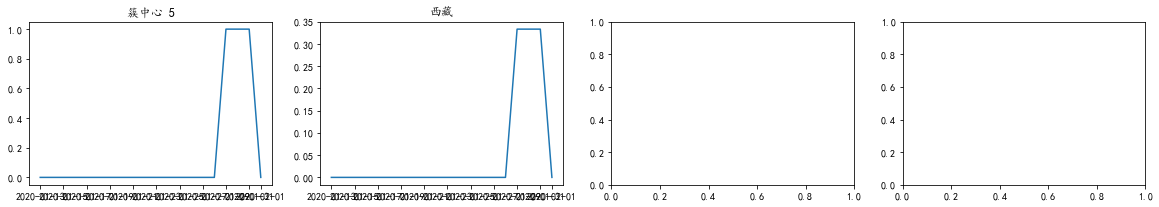

In [22]:
# 画出趋势图
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df_cluster_center = pd.DataFrame(cluster_centers.T, index=df_min_max.index, 
                                 columns=['簇中心 {}'.format(_ + 1) for _ in range(n_clusters)])
clusters_by_inc = {}
dfs = {}
for c_id, regions in enumerate(regions_by_cluster):
    clusters_by_inc[c_id] = regions
    df = df_cluster_center.iloc[:, [c_id]]
    dfs[c_id] = pd.concat([df, df_ma3[regions]], axis=1)
for c_id in range(n_clusters):
    print('=' * 100)
    print('簇 id：{}，{}，{}'.format(c_id, inc_desc[c_id], dfs[c_id].columns.tolist()))
    analyzer.subplots(dfs[c_id])

#### 2.2.3. 对上面两种分类汇总如下

In [23]:
import numpy as np
pd.set_option('display.max_rows', 50)
region_to_cum_id = {}
region_to_inc_id = {}
region_to_cum_desc = {}
region_to_inc_desc = {}
for region_dicts, clusters, desc in zip(
        [(region_to_cum_desc, region_to_cum_id), (region_to_inc_desc, region_to_inc_id)], 
        [clusters_by_cum, clusters_by_inc],
        [cum_desc, inc_desc]):
    region_dict, region_to_id = region_dicts
    for cluster_id, regions in clusters.items():
        for region in regions:
            region_to_id[region] = cluster_id
            if cluster_id == -1:
                cluster_id = 0
            val = desc[cluster_id]
            region_dict[region] = '{}'.format(val)
df_clusters = pd.DataFrame([
    pd.Series(region_to_cum_id), pd.Series(region_to_cum_desc),
    pd.Series(region_to_inc_id), pd.Series(region_to_inc_desc),
]).T
df_clusters.columns = ['累计簇 id', '累计', '趋势簇 id', '趋势']
df_clusters.fillna('特多', inplace=True)
# df_clusters['累计'] = pd.Categorical(df_clusters['累计'], ordered=True, categories=cum_desc.values())
# df_clusters['趋势'] = pd.Categorical(df_clusters['趋势'], ordered=True, categories=inc_desc.values())
df_clusters = df_clusters.sort_values(by=df_clusters.columns.tolist())

# 将累计和新增趋势取平均值
arr_cum = df_clusters['累计簇 id'].values
arr_inc = df_clusters['趋势簇 id'].values
cum_max = arr_cum.max()
inc_max = arr_inc.max()
arr_cum = arr_cum * inc_max
arr_inc = arr_inc * cum_max
a = np.mean([arr_cum, arr_inc], axis=0)
d = {_: i for i, _ in enumerate(np.unique(a))}
a = [d[_] for _ in a]
s = pd.Series(a, index=df_clusters.index, name='累计新增簇均值')
if s.name not in df_clusters.columns:
    df_clusters = pd.concat([df_clusters, s], axis=1)
df_clusters

,累计簇 id,累计,趋势簇 id,趋势,累计新增簇均值
湖北,0,特多,0,新增趋势向上加剧,0
广东,1,多,0,新增趋势向上加剧,1
浙江,1,多,1,新增趋势向上放缓,2
河南,1,多,1,新增趋势向上放缓,2
湖南,1,多,1,新增趋势向上放缓,2
江西,2,中,0,新增趋势向上加剧,2
安徽,2,中,1,新增趋势向上放缓,3
江苏,2,中,1,新增趋势向上放缓,3
四川,2,中,1,新增趋势向上放缓,3
山东,2,中,1,新增趋势向上放缓,3


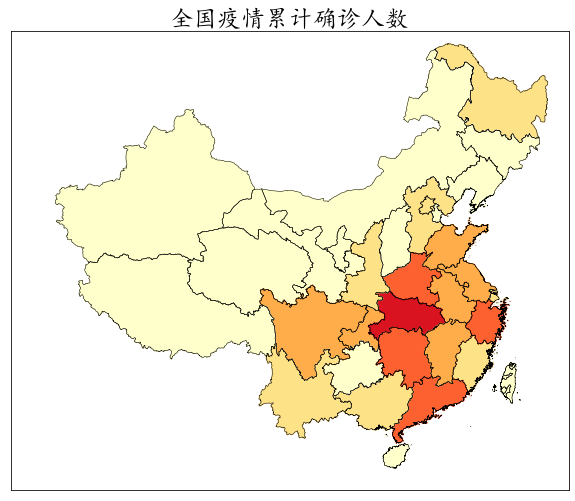

In [24]:
analyzer.plot_region_map(df_clusters['累计簇 id'], '全国疫情累计确诊人数')

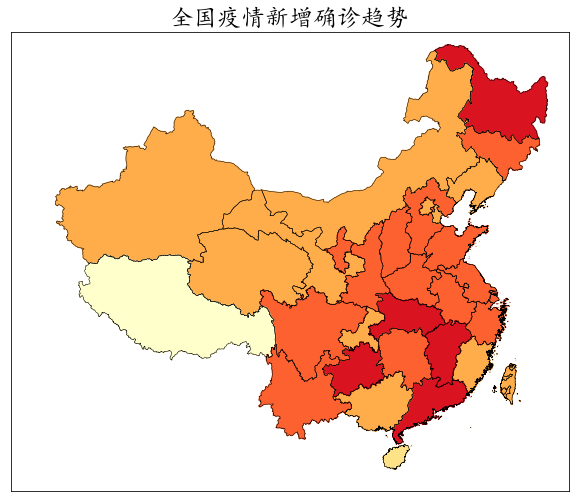

In [25]:
analyzer.plot_region_map(df_clusters['趋势簇 id'], '全国疫情新增确诊趋势')

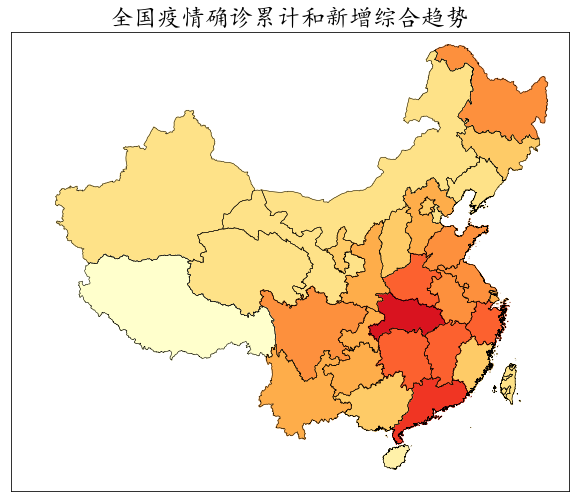

In [26]:
analyzer.plot_region_map(df_clusters['累计新增簇均值'], '全国疫情确诊累计和新增综合趋势')

### 2.3. 人流分析

通过百度迁徙获取的人流趋势数据（非人数，但是是可以比对的相对值，目前没有港澳台数据），按省/直辖市分类

In [27]:
from coronavirus_analyzer import CoronavirusAnalyzer
# last_date = None
analyzer = CoronavirusAnalyzer(last_date)
df_move_in_injured = analyzer.df_move_in_injured
for region in ['武汉', '湖北', '温州']:  # 去掉湖北和普通城市
    del df_move_in_injured[region]
df_move_in_injured.tail(3)

2020-02-02 19:19:26,787 - CoronavirusAnalyzer - WARNING - 在最后一天（2020-02-01），如下这些地区没有新增的确诊人数：台湾、西藏，如下这些地区没有任何疫情数据变化：台湾、西藏。请确保这些地区已经公布了最后一天的数据（一般是后面一天上午公布），否则分析出来的结果可能不准确。


,上海,云南,内蒙古,北京,吉林,四川,天津,宁夏,安徽,山东,山西,广东,广西,新疆,江苏,江西,河北,河南,浙江,海南,湖南,甘肃,福建,西藏,贵州,辽宁,重庆,陕西,青海,黑龙江
日期,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-30,7.394248e+06,1.626946e+06,497386.222164,3.500827e+06,559906.028424,3.624658e+06,1.476404e+06,214526.829197,3.466665e+06,1.872625e+06,8.868110e+05,1.717095e+07,3.200543e+06,438646.404154,7.966705e+06,2.518934e+06,2.084900e+06,3.622666e+06,4.696808e+06,446787.821592,5.883230e+06,522812.395361,2.403946e+06,94264.480296,2.726232e+06,892041.508433,5.000357e+06,1.756093e+06,190941.365545,514136.276834
2020-01-31,8.785127e+06,1.895509e+06,491337.814108,4.203817e+06,522346.474224,3.725051e+06,1.493352e+06,261470.749010,4.108145e+06,2.036950e+06,1.015387e+06,1.848146e+07,3.486672e+06,417449.599916,8.326291e+06,2.561594e+06,2.157834e+06,4.225961e+06,5.417059e+06,569202.526922,6.833149e+06,643481.317930,3.024915e+06,94599.449802,2.850607e+06,967144.887475,4.838476e+06,1.973337e+06,244021.308199,554553.305424
2020-02-01,7.924375e+06,1.307709e+06,434542.354182,4.095906e+06,509080.370170,3.239168e+06,1.382855e+06,159543.853524,3.940262e+06,1.807877e+06,8.776634e+05,1.349124e+07,3.644613e+06,340290.188381,6.936698e+06,2.257050e+06,1.875043e+06,4.413591e+06,3.866117e+06,523121.962360,7.438098e+06,492409.491412,2.372042e+06,89657.918669,2.252286e+06,807371.212943,5.538779e+06,1.924665e+06,173775.364340,468097.565879


In [28]:
df_inc_injured = analyzer.df_virus_daily_inc_injured
for region in ['全国', '武汉', '湖北', '台湾', '香港', '澳门']:  # 去掉严重的湖北，以及目前无法获取到人流信息的港澳台
    del df_inc_injured[region]
df_inc_injured = df_inc_injured.sort_index(axis=1)
df_inc_injured.tail(3)

,上海,云南,内蒙古,北京,吉林,四川,天津,宁夏,安徽,山东,山西,广东,广西,新疆,江苏,江西,河北,河南,浙江,海南,湖南,甘肃,福建,西藏,贵州,辽宁,重庆,陕西,青海,黑龙江
2020-01-30,27.0,6.0,1.0,7.0,0.0,35.0,4.0,4.0,37.0,33.0,4.0,82.0,9.0,3.0,39.0,78.0,17.0,74.0,109.0,3.0,55.0,3.0,19.0,0.0,3.0,4.0,41.0,24.0,0.0,16.0
2020-01-31,25.0,15.0,4.0,35.0,3.0,30.0,2.0,5.0,60.0,24.0,8.0,127.0,13.0,1.0,34.0,46.0,14.0,70.0,62.0,4.0,57.0,6.0,24.0,0.0,14.0,15.0,32.0,14.0,1.0,21.0
2020-02-01,24.0,8.0,4.0,27.0,5.0,24.0,11.0,2.0,43.0,23.0,9.0,84.0,11.0,3.0,34.0,47.0,8.0,71.0,62.0,10.0,74.0,5.0,15.0,0.0,9.0,9.0,24.0,15.0,2.0,15.0


In [29]:
analyzer.df_virus_injured

全国    武汉    湖北   浙江   广东   河南   湖南   安徽   江西   重庆   江苏  \
2019-12-31 00:00     27    27    27    0    0    0    0    0    0    0    0   
2020-01-03 08:00     44    44    44    0    0    0    0    0    0    0    0   
2020-01-05 08:00     59    59    59    0    0    0    0    0    0    0    0   
2020-01-11 00:00     41    41    41    0    0    0    0    0    0    0    0   
2020-01-12 00:00     41    41    41    0    0    0    0    0    0    0    0   
...                 ...   ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
2020-02-02 18:33  14483  4109  9074  661  632  493  463  340  333  275  236   
           18:40  14483  4109  9074  661  632  493  463  340  333  275  236   
           18:41  14483  4109  9074  661  632  493  463  340  333  275  236   
           18:49  14489  4109  9074  661  632  493  463  340  333  275  236   
           18:56  14489  4109  9074  661  632  493  463  340  333  275  236   

                   四川   山东   北京   上海   福建   陕西   广西   云南   河北  黑龙江  辽宁  海南  \
2019-12-31 00:00    0    0    0    0    0    0    0    0    0    0   0   0   
2020-01-03 08:00    0    0    0    0    0    0    0    0    0    0   0   0   
2020-01-05 08:00    0    0    0    0    0    0    0    0    0    0   0   0   
2020-01-11 00:00    0    0    0    0    0    0    0    0    0    0   0   0   
2020-01-12 00:00    0    0    0    0    0    0    0    0    0    0   0   0   
...               ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ..  ..   
2020-02-02 18:33  231  230  191  182  159  116  111   99  104   95  69  64   
           18:40  231  230  191  182  159  116  111   99  104   95  69  64   
           18:41  231  230  191  182  159  116  111   99  104   95  69  64   
           18:49  231  230  191  182  159  116  111  105  104   95  69  64   
           18:56  231  230  191  182  159  116  111  105  104   95  69  64   

                  山西  天津  甘肃  贵州  宁夏  内蒙古  吉林  新疆  香港  青海  台湾  澳门  西藏  
2019-12-31 00:00   0   0   0   0   0    0   0   0   0   0   0   0   0  
2020-01-03 08:00   0   0   0   0   0    0   0   0   0   0   0   0   0  
2020-01-05 08:00   0   0   0   0   0    0   0   0   0   0   0   0   0  
2020-01-11 00:00   0   0   0   0   0    0   0   0   0   0   0   0   0  
2020-01-12 00:00   0   0   0   0   0    0   0   0   0   0   0   0   0  
...               ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  
2020-02-02 18:33  56  48  40  38  28   27  23  21  14  11  10   8   1  
           18:40  56  48  40  38  28   27  23  21  14  11  10   8   1  
           18:41  56  48  40  38  28   27  23  21  14  11  10   8   1  
           18:49  56  48  40  38  28   27  23  21  14  11  10   8   1  
           18:56  56  48  40  38  28   27  23  21  14  11  10   8   1  

[402 rows x 36 columns]

In [30]:
from collections import OrderedDict
import numpy as np
import pandas as pd

s_virus_injured = analyzer.df_virus_injured.iloc[-1]
data = OrderedDict()
for region in df_move_in_injured.columns:
    corr_val = np.corrcoef(df_move_in_injured[region], df_inc_injured[region])[0, 1]
    data[region] = [s_virus_injured[region], corr_val]
df = pd.DataFrame(data).T
df.columns = ['累计确诊', '1月11日起每天新增确诊和近7天内进入人口风险系数的相关性']
df['累计确诊'] = df['累计确诊'].astype(np.int32)
df.sort_values('累计确诊', ascending=False)

,累计确诊,1月11日起每天新增确诊和近7天内进入人口风险系数的相关性
浙江,661,0.828900
广东,632,0.924547
河南,493,0.703741
湖南,463,0.791224
安徽,340,0.831969
江西,333,0.652065
重庆,275,0.718420
江苏,236,0.968566
四川,231,0.901783
山东,230,0.914344


## 3. 预测